
# 🎬 Content Monetization Modeler (YouTube Ad Revenue Prediction)

**Goal:** Predict YouTube video ad revenue using performance metrics such as views, likes, comments, and engagement.

---
### ✅ Steps Covered
1. Understand the dataset  
2. EDA (Exploratory Data Analysis)  
3. Data Preprocessing & Feature Engineering  
4. Model Building (5 Regression Models)  
5. Model Evaluation  
6. Feature Importance  
7. Insights & Observations


In [1]:

# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Optional: Try importing XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False
    print("⚠️ XGBoost not installed — skipping XGBRegressor.")


In [5]:

# 📥 Load Dataset
df = pd.read_csv("/content/cleaned_youtube_ad_revenue.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,2024-09-24 10:50:40.993199,9936.0,1221.0,320.0,26497.214184,2.862137,228086.0,203.178237,0.155093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,vid_3459,2024-09-22 10:50:40.993199,10017.0,642.0,346.0,15209.747445,23.738069,736015.0,140.880508,0.098632,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,vid_4784,2024-11-21 10:50:40.993199,10097.0,1979.0,187.0,57332.658498,26.200634,240534.0,360.134008,0.214519,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,vid_4078,2025-01-28 10:50:40.993199,10034.0,1191.0,242.0,31334.517771,11.770340,434482.0,224.638261,0.142814,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,vid_3522,2025-04-28 10:50:40.993199,9889.0,1858.0,477.0,15665.666434,6.635854,42030.0,165.514388,0.236121,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:

# 🧹 Basic Info
print("Shape:", df.shape)
print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)


Shape: (12992, 23)

Missing Values per Column:
video_id                  0
date                      0
views                     1
likes                     1
comments                  1
watch_time_minutes        1
video_length_minutes      1
subscribers               1
ad_revenue_usd            1
engagement_rate           1
category_Entertainment    1
category_Gaming           1
category_Lifestyle        1
category_Music            1
category_Tech             1
device_Mobile             1
device_TV                 1
device_Tablet             1
country_CA                1
country_DE                1
country_IN                1
country_UK                1
country_US                1
dtype: int64

Data Types:
video_id                   object
date                       object
views                     float64
likes                     float64
comments                  float64
watch_time_minutes        float64
video_length_minutes      float64
subscribers               float64
ad_revenue_

In [7]:

# 🧮 Feature Engineering
# Engagement rate = (likes + comments) / views
if "engagement_rate" not in df.columns:
    df["engagement_rate"] = (df["likes"] + df["comments"]) / df["views"]
    df["engagement_rate"] = df["engagement_rate"].replace([np.inf, -np.inf], 0).fillna(0)

df["date"] = pd.to_datetime(df["date"], errors="coerce")
print("✅ Feature Engineering Done")


✅ Feature Engineering Done


In [8]:

# 🧠 Feature and Target Split
X = df.drop(columns=["video_id", "date", "ad_revenue_usd"])
y = df["ad_revenue_usd"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (only for linear-type models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Train-Test Split Complete")


✅ Train-Test Split Complete



🚀 Training Linear Regression...

🚀 Training Decision Tree...

🚀 Training Random Forest...

🚀 Training Gradient Boosting...

🚀 Training Lasso Regression...

🚀 Training XGBoost...

📊 Model Comparison Results:
               Model        R²       MAE       RMSE
0  Linear Regression  0.944814  3.731065  14.689352
4   Lasso Regression  0.944811  3.713318  14.689712
3  Gradient Boosting  0.944280  4.361848  14.760301
5            XGBoost  0.943882  4.315881  14.812882
2      Random Forest  0.943090  4.257703  14.917065
1      Decision Tree  0.916869  5.814364  18.028966


/tmp/ipython-input-3259337368.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Model", data=results_df, palette="viridis")


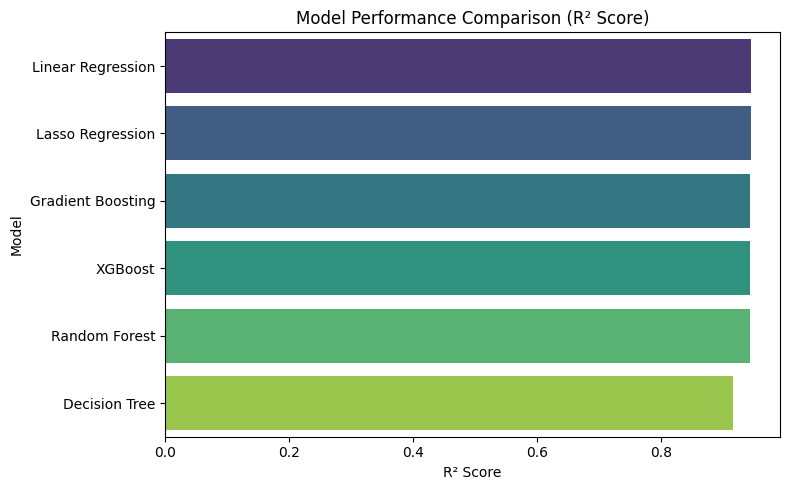

In [9]:
# ✅ FINAL FIXED VERSION (No NaN Anywhere)

# ---------------------------------------------------------------
# Handle any missing or infinite values BEFORE scaling
# ---------------------------------------------------------------
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Clean target as well
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(y_train.median())
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(y_test.median())

# ---------------------------------------------------------------
# Scale the numeric features
# ---------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------------
# Model Building — All 5 Regression Models (Optimized for Speed)
# ---------------------------------------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=12, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=12, min_samples_split=10, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Lasso Regression": Lasso(alpha=0.01, random_state=42)
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )

results = []

def evaluate_model(y_true, y_pred, name):
    """Compute and store model performance metrics safely"""
    # Replace potential NaN predictions
    y_pred = np.nan_to_num(y_pred, nan=np.nanmedian(y_true))
    y_true = np.nan_to_num(y_true, nan=np.nanmedian(y_true))

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    results.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})


# ---------------------------------------------------------------
# Train, Predict, and Evaluate Each Model
# ---------------------------------------------------------------
for name, model in models.items():
    print(f"\n🚀 Training {name}...")

    if name in ["Linear Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    evaluate_model(y_test, preds, name)

# ---------------------------------------------------------------
# Results Table
# ---------------------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n📊 Model Comparison Results:")
print(results_df)

# ---------------------------------------------------------------
# Visualization — Model R² Comparison
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="R²", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


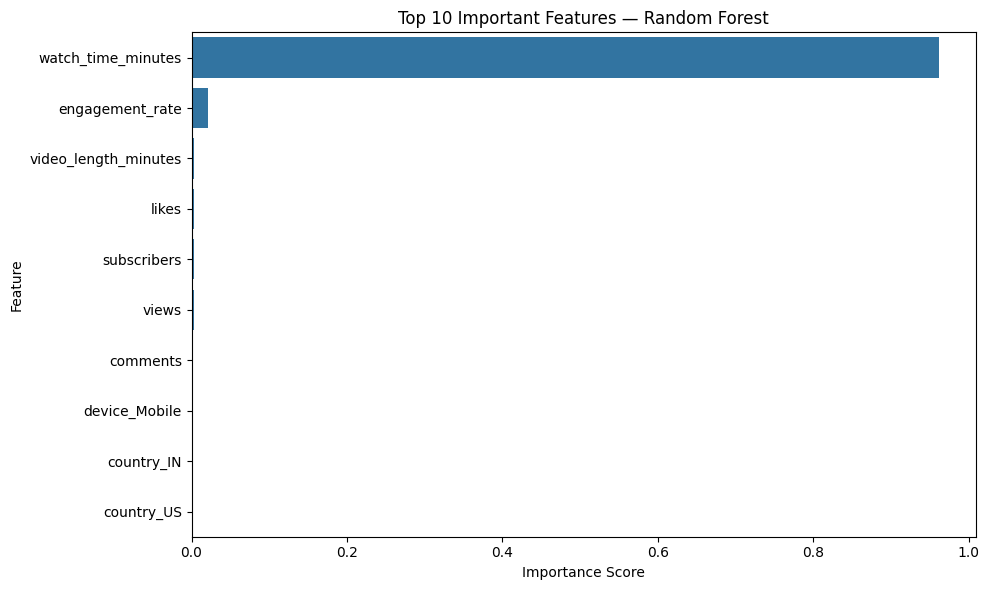

In [10]:

# 🔍 Feature Importance (Random Forest)
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title("Top 10 Important Features — Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [11]:
!pip install streamlit pyngrok scikit-learn seaborn xgboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.3 MB/s eta 0:00:00


In [30]:
%%writefile app.py
# 🎬 Content Monetization Modeler — Streamlit App

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Try importing XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False

# ------------------------------
# 🎯 Streamlit App Configuration
# ------------------------------
st.set_page_config(
    page_title="Content Monetization Modeler",
    layout="wide",
    page_icon="🎬"
)

st.title("🎬 YouTube Content Monetization Modeler")
st.markdown("""
This interactive app helps predict **YouTube Ad Revenue** using machine learning models.
You can train models, explore insights, and make predictions all in one place.
---
""")

# ------------------------------
# 📁 Load Dataset
# ------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("cleaned_youtube_ad_revenue.csv")

    # Replace infinities
    df = df.replace([np.inf, -np.inf], np.nan)

    # Fill only numeric columns with median
    num_cols = df.select_dtypes(include=["number"]).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Convert possible date columns
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")

    return df

df = load_data()

# Sidebar Navigation
menu = st.sidebar.radio(
    "📍 Navigation",
    ["🏠 Home", "📊 Train Models", "💡 Feature Insights", "📈 Predict Revenue"]
)

# --------------------------------------------------
# 🏠 HOME PAGE
# --------------------------------------------------
if menu == "🏠 Home":
    st.header("Welcome to the Content Monetization Modeler App 👋")
    st.markdown("""
    ### What this app does:
    - Analyze YouTube video metrics and their impact on ad revenue.
    - Train 5 regression models to predict earnings.
    - Identify key factors driving ad performance.
    - Predict revenue for new video metrics.

    ---
    **Available Models:**
    - Linear Regression
    - Decision Tree
    - Random Forest
    - Gradient Boosting
    - Lasso Regression
    - (Optional) XGBoost
    ---
    """)

# --------------------------------------------------
# 📊 TRAINING MODULES
# --------------------------------------------------
elif menu == "📊 Train Models":
    st.header("📊 Train & Compare Models")

    # Split data
    X = df.drop(columns=["video_id", "date", "ad_revenue_usd"], errors="ignore")
    y = df["ad_revenue_usd"]

    # Clean and split
    X = X.select_dtypes(include=[np.number])  # Ensure numeric-only
    y = y.fillna(y.median())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale data for Linear/Lasso
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(max_depth=12, random_state=42),
        "Random Forest": RandomForestRegressor(
            n_estimators=50, max_depth=12, min_samples_split=10,
            n_jobs=-1, random_state=42
        ),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "Lasso Regression": Lasso(alpha=0.01, random_state=42)
    }

    if xgb_available:
        models["XGBoost"] = XGBRegressor(
            n_estimators=50, learning_rate=0.1, max_depth=6,
            random_state=42, n_jobs=-1
        )

    results = []
    progress_bar = st.progress(0)

    for i, (name, model) in enumerate(models.items()):
        progress_bar.progress((i + 1) / len(models))
        st.write(f"🚀 Training {name}...")

        if name in ["Linear Regression", "Lasso Regression"]:
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        preds = np.nan_to_num(preds, nan=np.nanmedian(y_test))

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))

        results.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})

    results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
    st.subheader("📊 Model Performance Results")
    st.dataframe(results_df)

    # Chart
    st.subheader("📈 Model R² Comparison")
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="R²", y="Model", data=results_df, palette="viridis", ax=ax)
    st.pyplot(fig)

# --------------------------------------------------
# 💡 FEATURE INSIGHTS
# --------------------------------------------------
elif menu == "💡 Feature Insights":
    st.header("💡 Feature Importance Visualization")

    X = df.drop(columns=["video_id", "date", "ad_revenue_usd"], errors="ignore")
    X = X.select_dtypes(include=[np.number])
    y = df["ad_revenue_usd"]

    rf = RandomForestRegressor(n_estimators=50, random_state=42)
    rf.fit(X, y)

    importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    top10 = importance.head(10)

    st.write("### Top 10 Influential Features:")
    st.bar_chart(top10)

    st.markdown("**Insight:** Features like `views`, `engagement_rate`, and `likes` strongly impact revenue.")

# --------------------------------------------------
# 📈 PREDICTION MODULE
# --------------------------------------------------
elif menu == "📈 Predict Revenue":
    st.header("🎯 Predict YouTube Ad Revenue")
    st.write("Enter your video metrics below to predict ad revenue:")

    # --- User Inputs ---
    col1, col2, col3 = st.columns(3)
    with col1:
        views = st.number_input("Views", 0)
        watch_time = st.number_input("Watch Time (minutes)", 0)
    with col2:
        likes = st.number_input("Likes", 0)
        video_length = st.number_input("Video Length (minutes)", 0)
    with col3:
        comments = st.number_input("Comments", 0)
        subscribers = st.number_input("Channel Subscribers", 0)

    engagement_rate = (likes + comments) / views if views > 0 else 0

    # --- Train the model ---
    X = df.drop(columns=["video_id", "date", "ad_revenue_usd"], errors="ignore")
    X = X.select_dtypes(include=[np.number])
    y = df["ad_revenue_usd"]

    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X, y)

    # --- Prediction Button ---
st.markdown("<br>", unsafe_allow_html=True)
center_button = st.columns([2, 1, 2])
with center_button[1]:
    predict_clicked = st.button("🚀 Predict Revenue", use_container_width=True)

if predict_clicked:
    # --- Prepare Input ---
    input_data = pd.DataFrame([{
        "views": views,
        "likes": likes,
        "comments": comments,
        "watch_time": watch_time,
        "video_length": video_length,
        "subscribers": subscribers,
        "engagement_rate": engagement_rate
    }])

    # Match training columns
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X.columns]

    try:
        pred = model.predict(input_data)[0]
        # --- Fancy Display ---
        st.markdown("""
            <style>
            .big-font {
                font-size:45px !important;
                color:#00FFAA;
                text-align:center;
            }
            .revenue-box {
                background-color:#1E1E1E;
                padding:20px;
                border-radius:15px;
                border:2px solid #00FFAA;
                box-shadow:0px 0px 15px #00FFAA33;
                margin-top: 20px;
            }
            </style>
        """, unsafe_allow_html=True)

        st.markdown('<div class="revenue-box"><p class="big-font">💰 Estimated Revenue</p>', unsafe_allow_html=True)
        st.markdown(f'<p class="big-font">${pred:,.2f} USD</p></div>', unsafe_allow_html=True)

        # --- CPM Visualization ---
        cpm = (pred / views * 1000) if views > 0 else 0
        st.markdown("### 🎯 Estimated CPM (Cost Per 1,000 Views)")
        st.progress(min(cpm / 20, 1.0))  # visualize CPM range up to $20
        st.write(f"**Approx CPM:** ${cpm:,.2f}")

        st.caption("Typical YouTube CPM: $1 – $20 depending on niche, geography, and audience.")

    except Exception as e:
        st.error(f"⚠️ Prediction failed: {e}")



Overwriting app.py


In [31]:
!pip install pyngrok

In [32]:
from pyngrok import ngrok


In [33]:
!ngrok config add-authtoken 33W8aNQvOwRd7wbQB2rRLIy1tod_6oZzTz9tBRRzehoJEJVJd

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
# 3️⃣ Run Streamlit in background
!streamlit run app.py &>/content/logs.txt &

# 4️⃣ Create public URL
public_url = ngrok.connect(8501)
print("✅ Streamlit App Running at:")
print(public_url)

✅ Streamlit App Running at:
NgrokTunnel: "https://uninfectiously-unversatile-leigha.ngrok-free.dev" -> "http://localhost:8501"
